In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_csv('train.csv')

/var/folders/6n/pcltk5896ts9hbxrsn2fxxyw0000gn/T/ipykernel_17188/702694389.py:30: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13445 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18658 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

In [3]:
df_train = df.select_dtypes(exclude=['object'])

for feature in df_train:
    total_NaN = 0
    for y in df[feature]:
        if y != y:
            total_NaN += 1
    print(f"{feature} -> {total_NaN} NaNs ")
print("Total Rows - ", df.shape[0])

id -> 0 NaNs 
host_id -> 0 NaNs 
host_acceptance_rate -> 33538 NaNs 
host_listings_count -> 5 NaNs 
accommodates -> 0 NaNs 
bathrooms -> 60 NaNs 
bedrooms -> 33 NaNs 
beds -> 31 NaNs 
square_feet -> 33197 NaNs 
price -> 0 NaNs 
guests_included -> 0 NaNs 
minimum_nights -> 0 NaNs 
maximum_nights -> 0 NaNs 
number_of_reviews -> 0 NaNs 
review_scores_rating -> 7664 NaNs 
review_scores_accuracy -> 7694 NaNs 
review_scores_cleanliness -> 7679 NaNs 
review_scores_checkin -> 7709 NaNs 
review_scores_communication -> 7689 NaNs 
review_scores_location -> 7708 NaNs 
review_scores_value -> 7711 NaNs 
calculated_host_listings_count -> 0 NaNs 
reviews_per_month -> 6947 NaNs 
Total Rows -  33538


In [4]:
drop_features = ["host_acceptance_rate", "square_feet" ]
df_train = df_train.drop(drop_features, axis = 1)

# df_train['host_listings_count'] = df_train['host_listings_count'].fillna(0)
# plt.plot(df_train['price'], df_train['host_listings_count'], marker='o', linestyle='-')

In [5]:
df_train['price_log'] = np.log(df_train.price+1)
df_train.head(10)

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_log
0,22267382,1910170,1.0,2,1.0,1.0,1.0,145.0,2,7,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.59,4.983607
1,2473861,8826175,4.0,8,1.0,3.0,5.0,175.0,3,3,...,91.0,9.0,9.0,9.0,9.0,9.0,9.0,3,2.47,5.170484
2,25079703,4383563,1.0,2,1.0,0.0,1.0,180.0,1,2,...,100.0,10.0,9.0,9.0,10.0,10.0,10.0,1,0.89,5.198497
3,9342478,10406276,1.0,1,1.0,1.0,1.0,42.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3.761200
4,4866426,2346300,1.0,2,1.0,1.0,1.0,80.0,1,1,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.14,4.394449
5,19115443,2856748,104.0,6,2.5,2.0,3.0,550.0,1,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,6.311735
6,12132427,10584659,1.0,4,1.0,1.0,1.0,177.0,2,3,...,93.0,10.0,9.0,9.0,9.0,10.0,9.0,1,0.38,5.181784
7,27551517,7186760,1.0,1,1.0,1.0,3.0,70.0,1,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00,4.262680
8,27016367,202886988,1.0,16,2.0,0.0,1.0,500.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,6.216606
9,14028380,7932698,1.0,4,1.0,1.0,2.0,106.0,2,1,...,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.10,4.672829


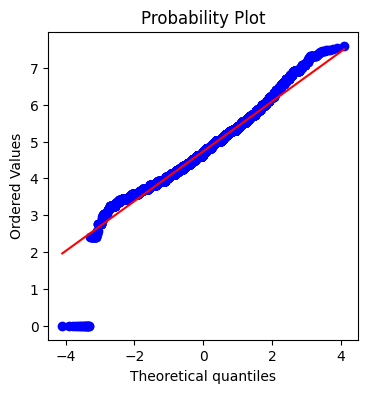

In [6]:
plt.figure(figsize=(4, 4))
stats.probplot(df_train['price_log'], plot=plt)
plt.show()

In [7]:
df_train.head(10)

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_log
0,22267382,1910170,1.0,2,1.0,1.0,1.0,145.0,2,7,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.59,4.983607
1,2473861,8826175,4.0,8,1.0,3.0,5.0,175.0,3,3,...,91.0,9.0,9.0,9.0,9.0,9.0,9.0,3,2.47,5.170484
2,25079703,4383563,1.0,2,1.0,0.0,1.0,180.0,1,2,...,100.0,10.0,9.0,9.0,10.0,10.0,10.0,1,0.89,5.198497
3,9342478,10406276,1.0,1,1.0,1.0,1.0,42.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3.761200
4,4866426,2346300,1.0,2,1.0,1.0,1.0,80.0,1,1,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3.14,4.394449
5,19115443,2856748,104.0,6,2.5,2.0,3.0,550.0,1,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,6.311735
6,12132427,10584659,1.0,4,1.0,1.0,1.0,177.0,2,3,...,93.0,10.0,9.0,9.0,9.0,10.0,9.0,1,0.38,5.181784
7,27551517,7186760,1.0,1,1.0,1.0,3.0,70.0,1,2,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00,4.262680
8,27016367,202886988,1.0,16,2.0,0.0,1.0,500.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,6.216606
9,14028380,7932698,1.0,4,1.0,1.0,2.0,106.0,2,1,...,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.10,4.672829


In [8]:
df_model = df_train.drop(["id","host_id","price"], axis = 1)

df_model.isnull().sum()

host_listings_count                  5
accommodates                         0
bathrooms                           60
bedrooms                            33
beds                                31
guests_included                      0
minimum_nights                       0
maximum_nights                       0
number_of_reviews                    0
review_scores_rating              7664
review_scores_accuracy            7694
review_scores_cleanliness         7679
review_scores_checkin             7709
review_scores_communication       7689
review_scores_location            7708
review_scores_value               7711
calculated_host_listings_count       0
reviews_per_month                 6947
price_log                            0
dtype: int64

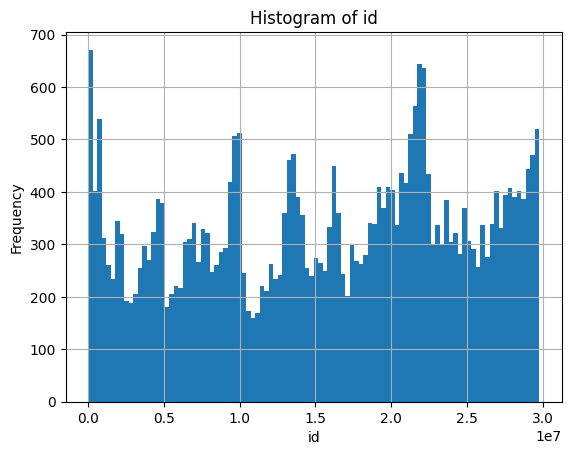

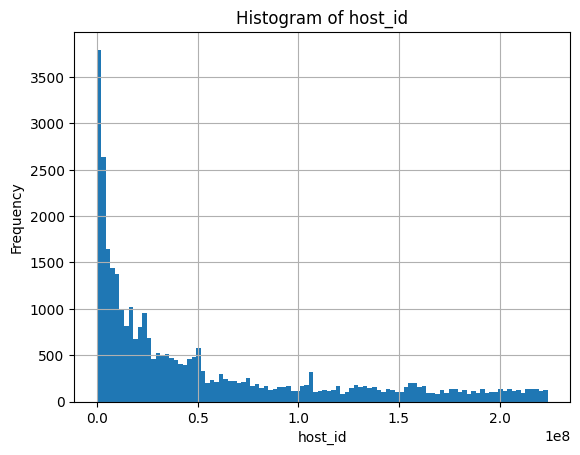

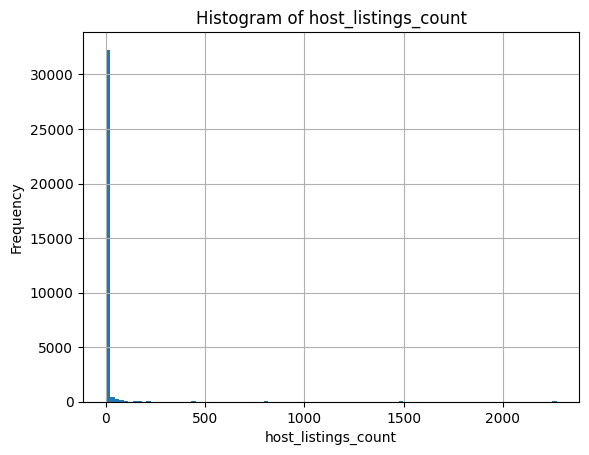

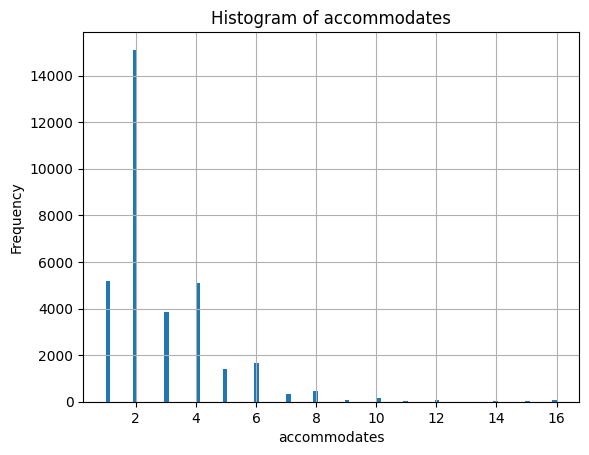

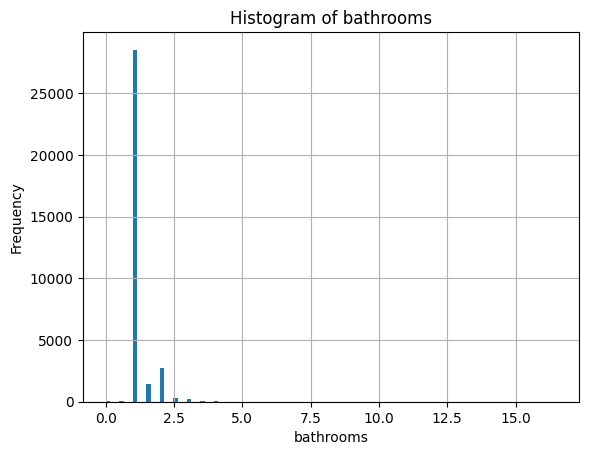

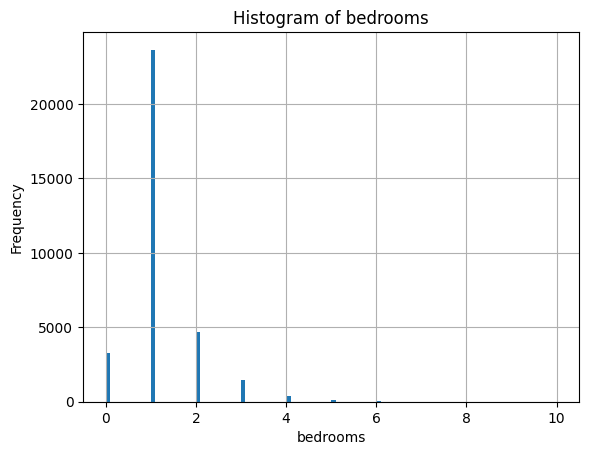

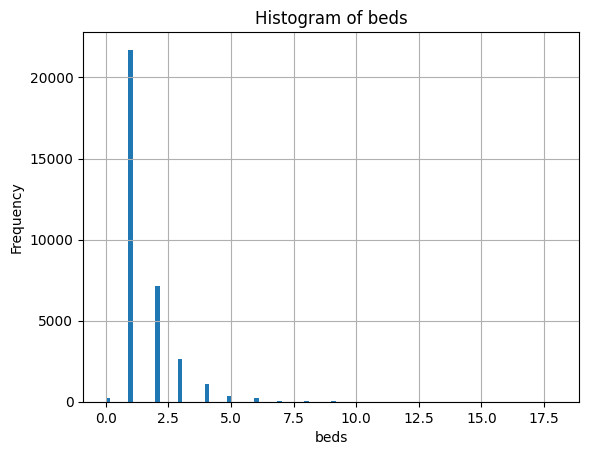

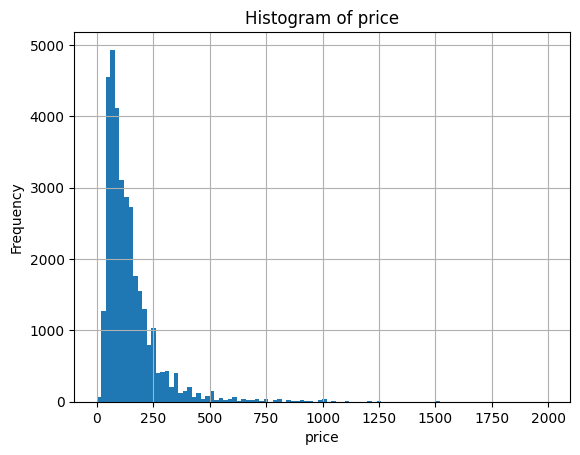

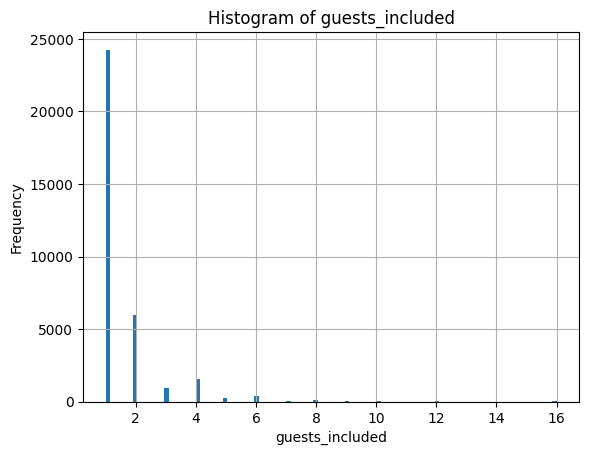

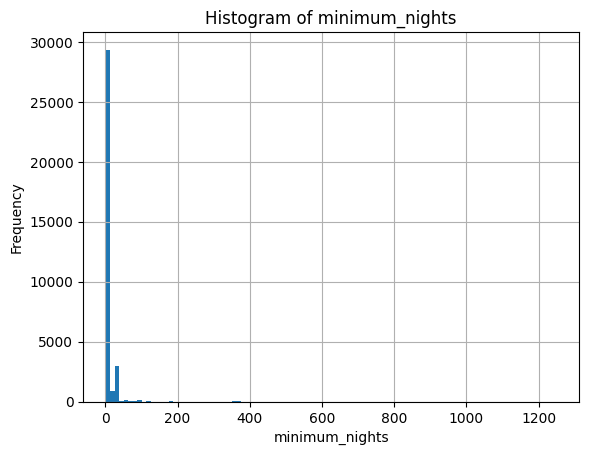

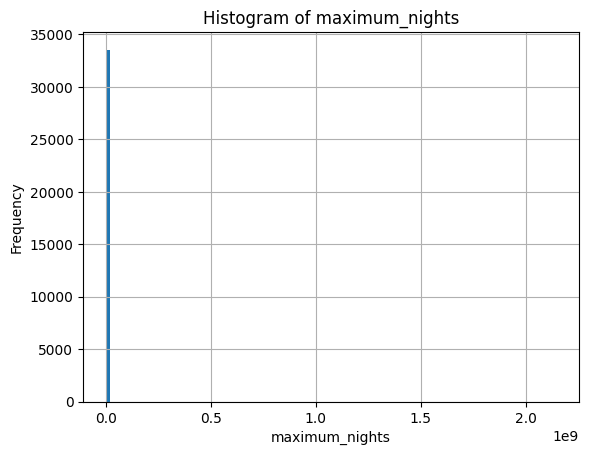

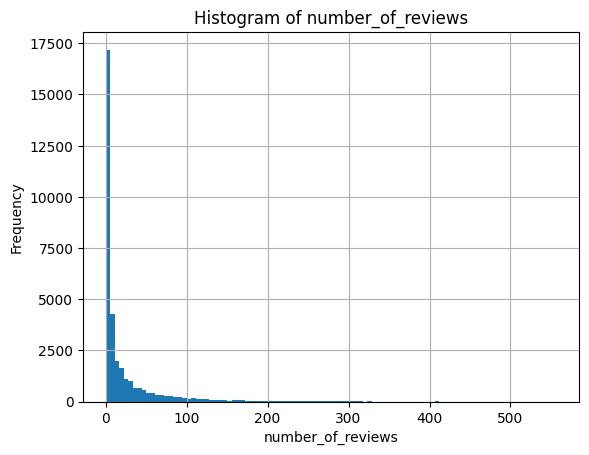

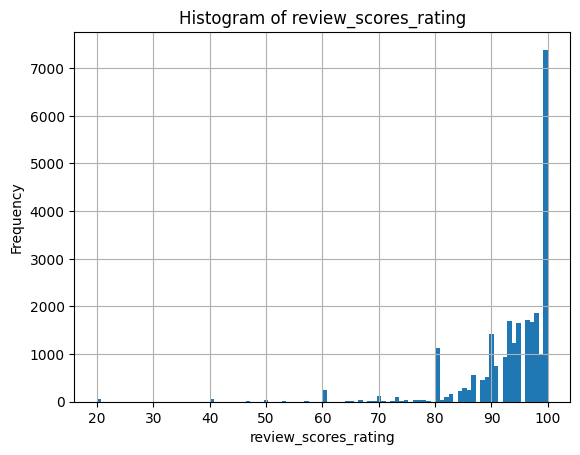

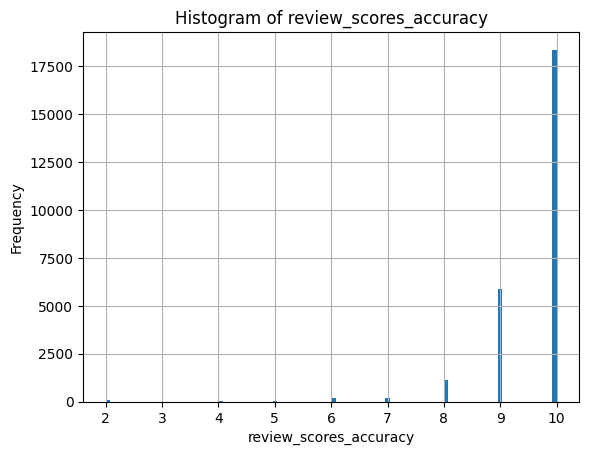

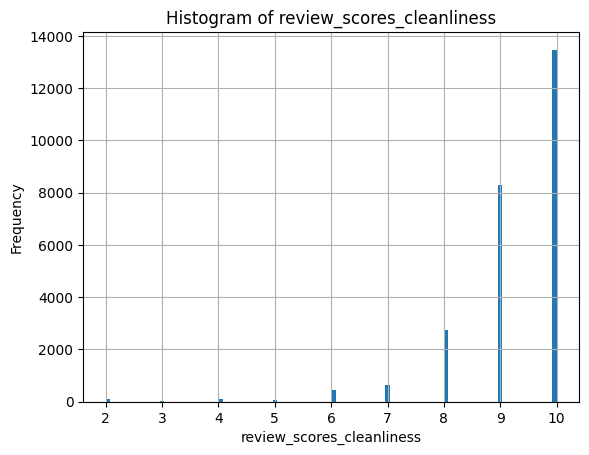

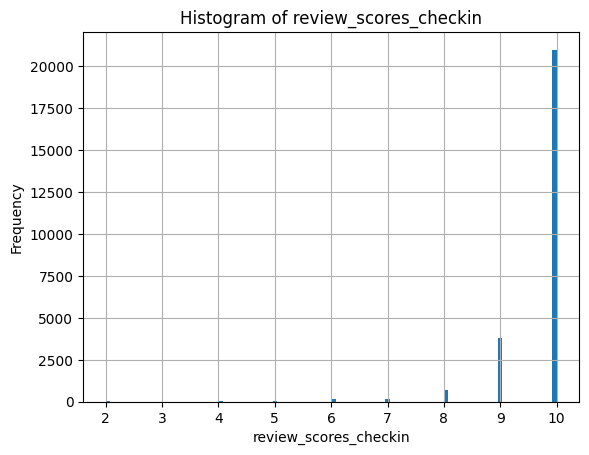

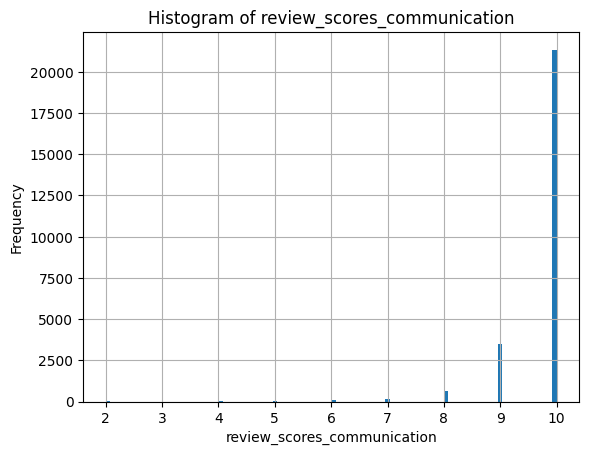

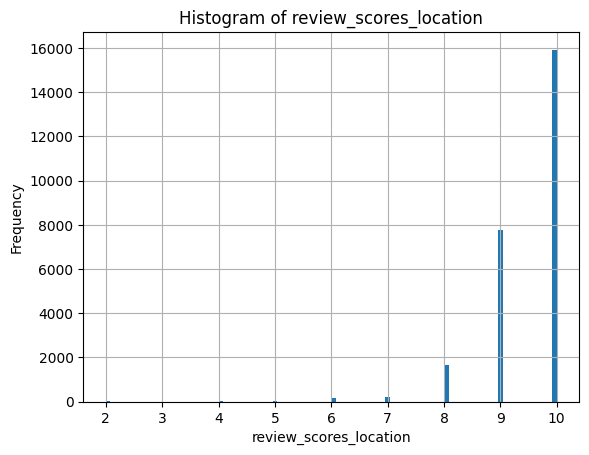

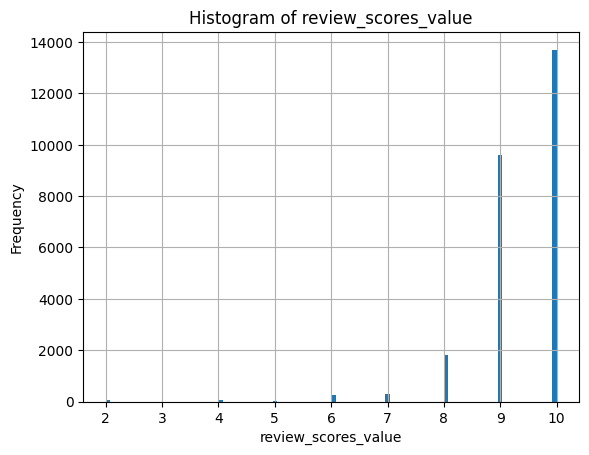

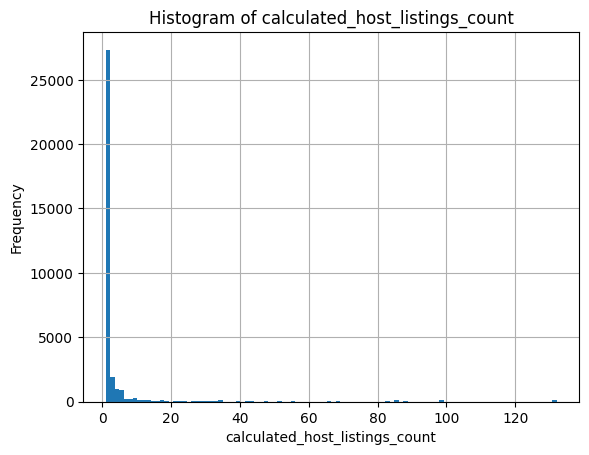

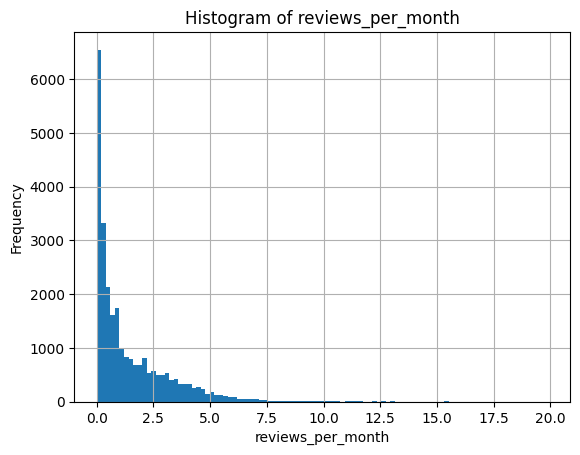

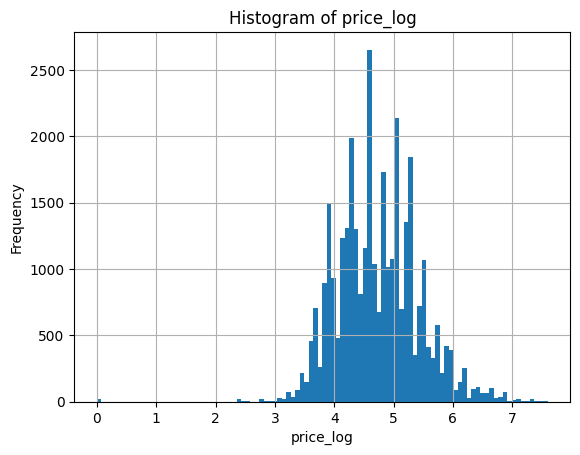

In [9]:
for column in df_train.columns:
    df_train[column].hist(bins=100)  # You can adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()



In [10]:
median_host_listings_count = df_model['host_listings_count'].median()
df_model['host_listings_count'].fillna(median_host_listings_count, inplace=True)

median_accommodates = df_model['accommodates'].median()
df_model['accommodates'].fillna(median_accommodates, inplace=True)

median_bathrooms = df_model['bathrooms'].median()
df_model['bathrooms'].fillna(median_bathrooms, inplace=True)

median_bedrooms = df_model['bedrooms'].median()
df_model['bedrooms'].fillna(median_bedrooms, inplace=True)

median_beds = df_model['beds'].median()
df_model['beds'].fillna(median_beds, inplace=True)

median_review_scores_rating = df_model['review_scores_rating'].median()
df_model['review_scores_rating'].fillna(median_review_scores_rating, inplace=True)

median_review_scores_accuracy = df_model['review_scores_accuracy'].median()
df_model['review_scores_accuracy'].fillna(median_review_scores_accuracy, inplace=True)

median_review_scores_cleanliness = df_model['review_scores_cleanliness'].median()
df_model['review_scores_cleanliness'].fillna(median_review_scores_cleanliness, inplace=True)

median_review_scores_checkin = df_model['review_scores_checkin'].median()
df_model['review_scores_checkin'].fillna(median_review_scores_checkin, inplace=True)

median_review_scores_communication = df_model['review_scores_communication'].median()
df_model['review_scores_communication'].fillna(median_review_scores_communication, inplace=True)

median_review_scores_location = df_model['review_scores_location'].median()
df_model['review_scores_location'].fillna(median_review_scores_location, inplace=True)

median_review_scores_value = df_model['review_scores_value'].median()
df_model['review_scores_value'].fillna(median_review_scores_value, inplace=True)

median_reviews_per_month = df_model['reviews_per_month'].median()
df_model['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

df_model.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month                 0
price_log                         0
dtype: int64

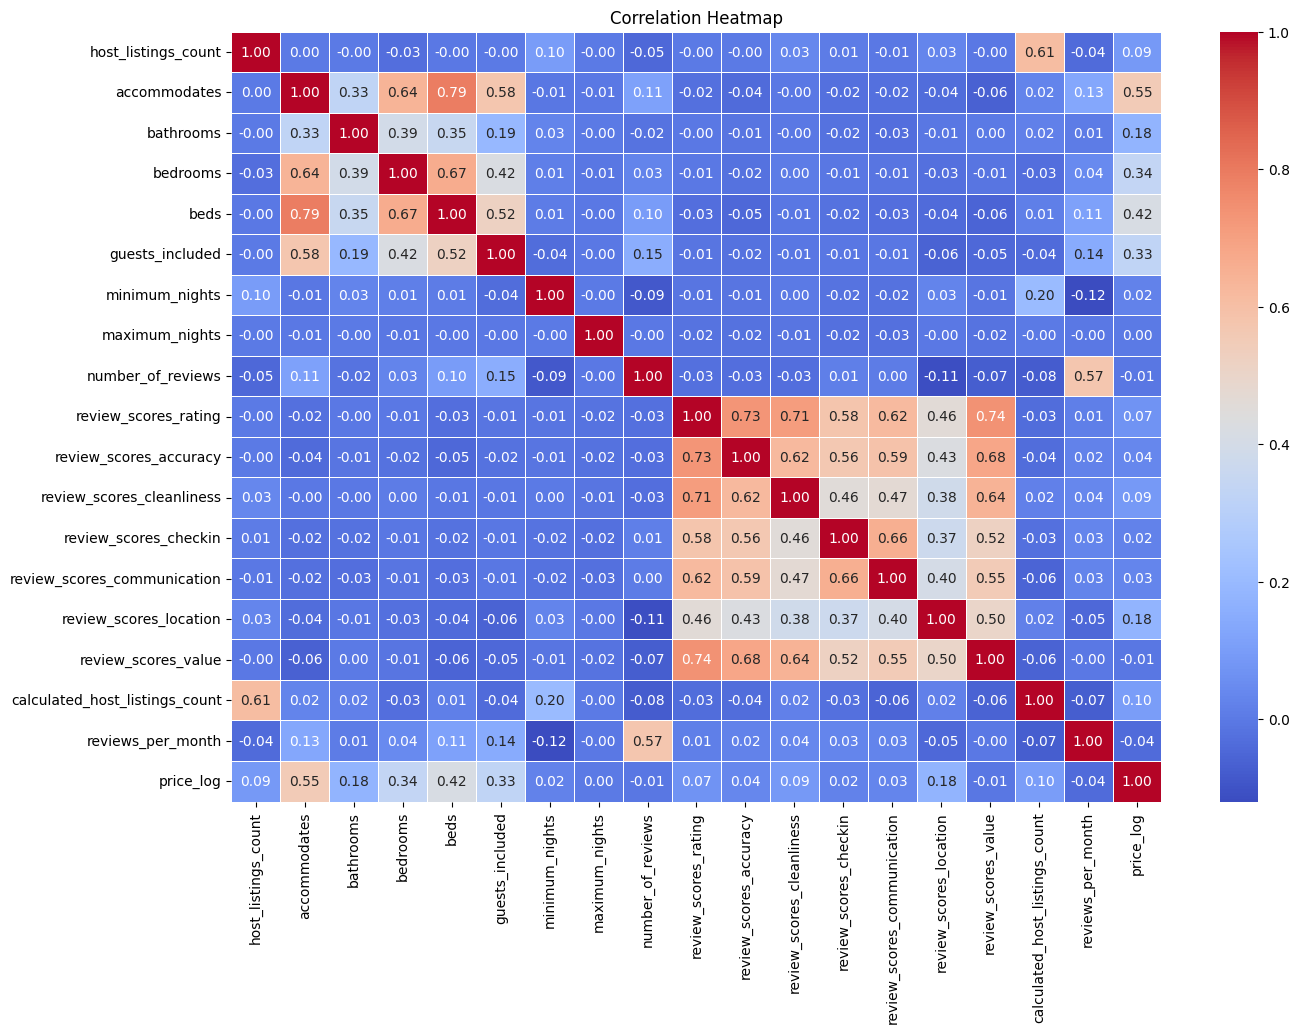

In [11]:
# Plot correlation heatmap
correlation_matrix = df_model.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df_model_x, df_model_y = df_model.iloc[:,:-1], df_model.iloc[:,-1]

/Users/parthgupta/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


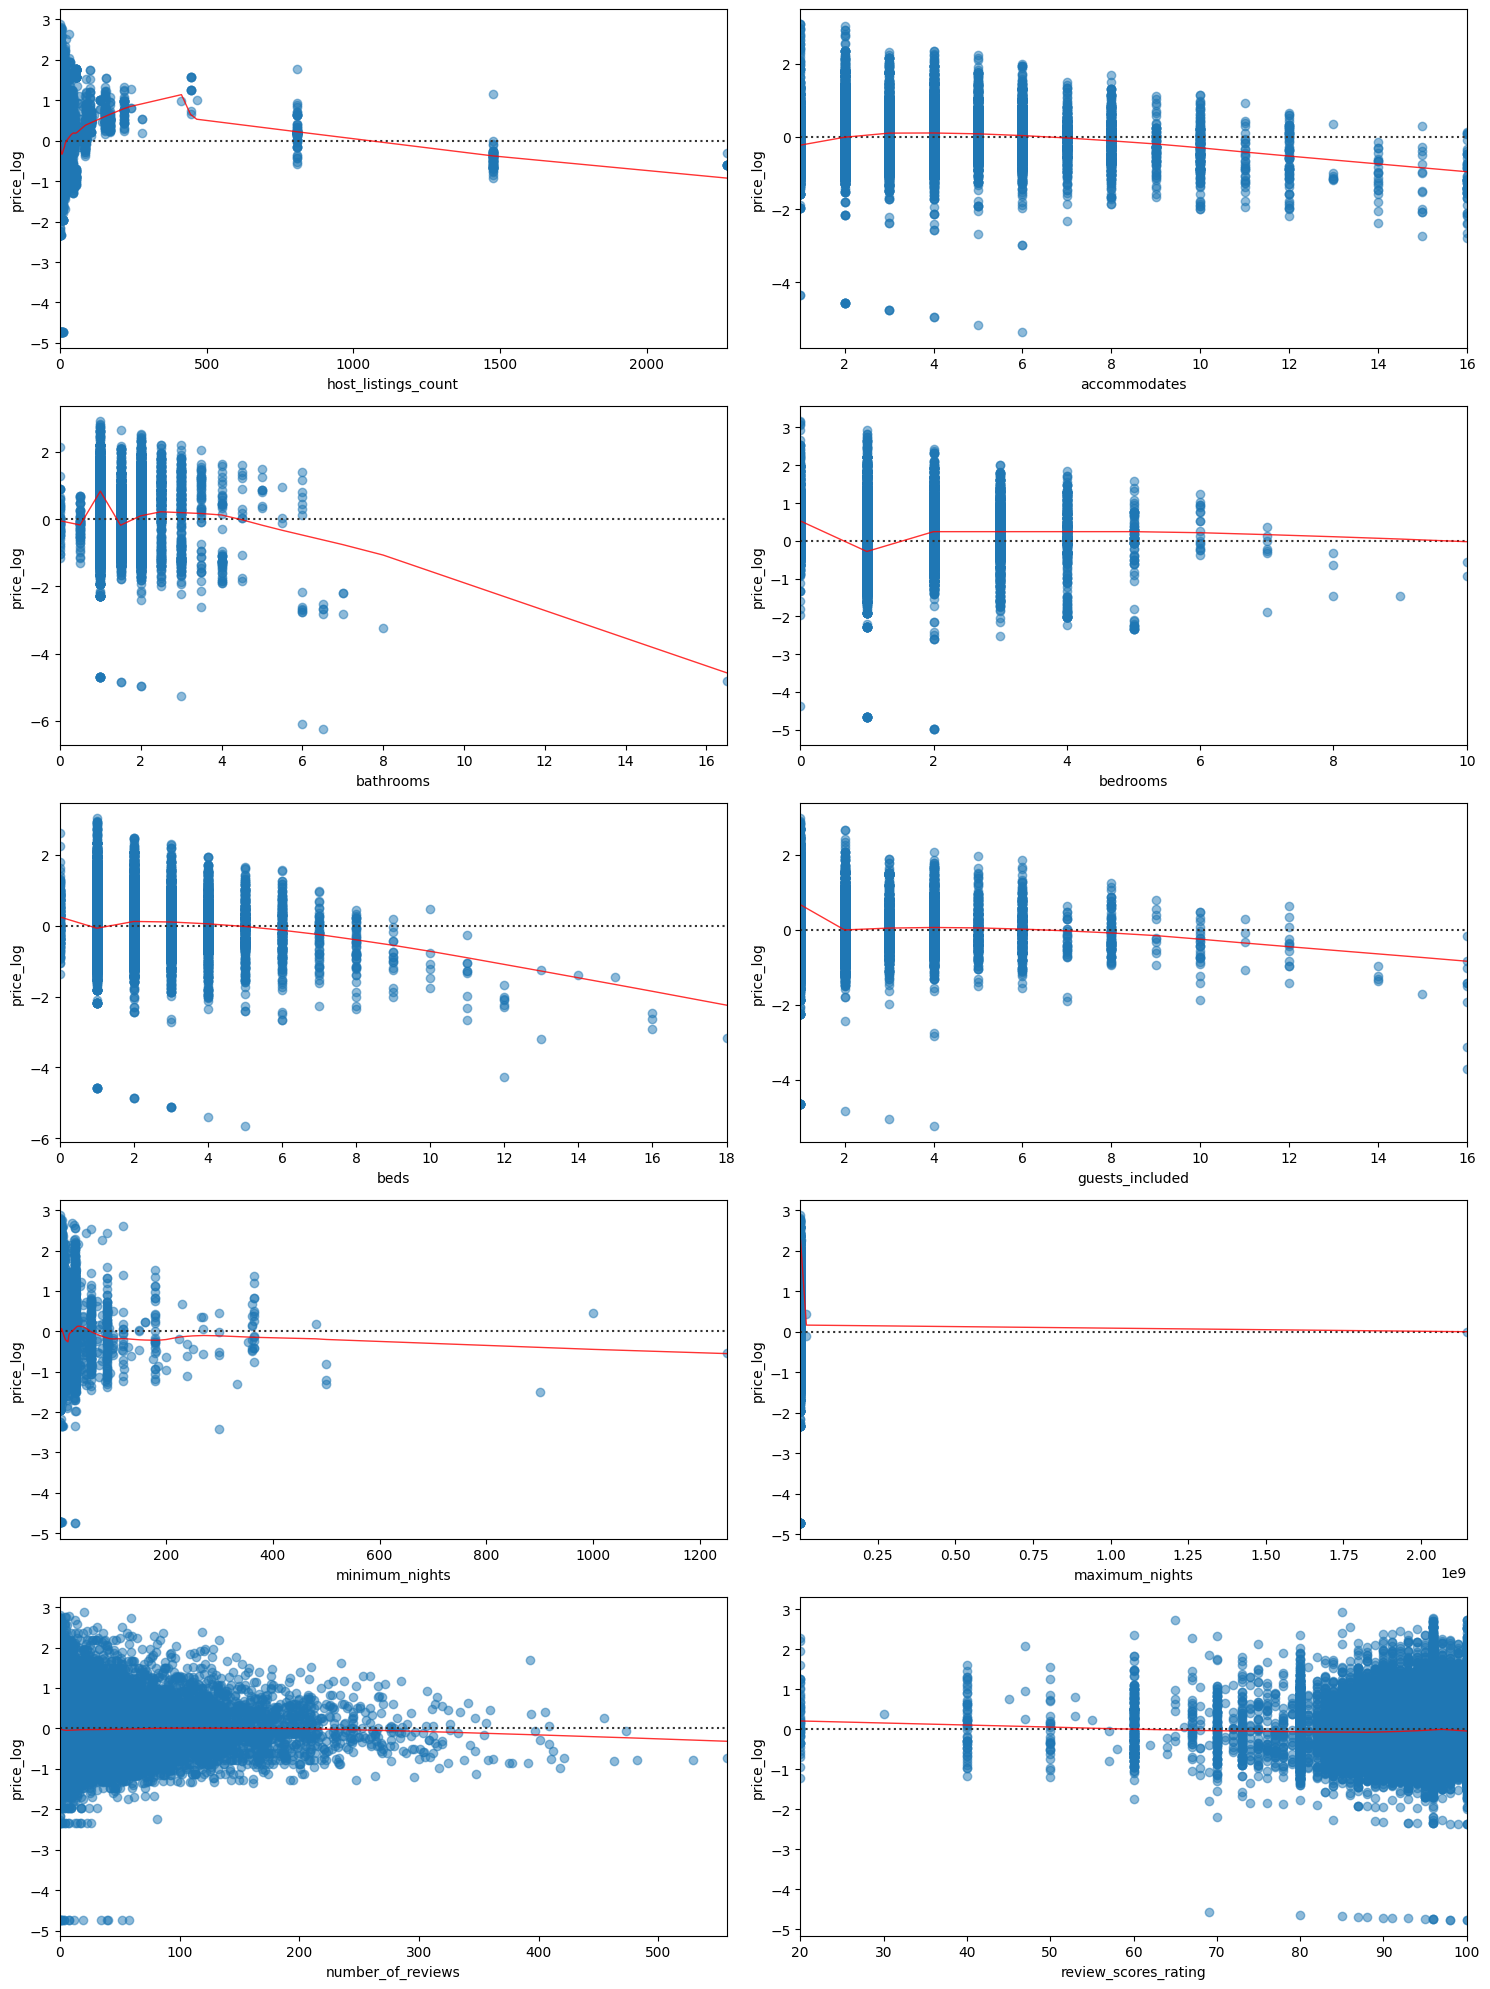

In [14]:
# Create subplots
f, axes = plt.subplots(5, 2, figsize=(15, 20))

# Iterate through each feature and plot its residual plot
for i, ax in enumerate(axes.flatten()):
    sns.residplot(x = df_model_x.iloc[:, i], y = df_model_y, lowess=True, ax=ax,
                  scatter_kws={'alpha': 0.5},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#     ax.set_title(f'Residual Plot for Feature {i+1}')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(correlation_matrix)
multicollinearity

array([4.39714933, 3.36116583, 1.84246286, 1.47730915, 1.00076019,
       0.93961208, 0.88238406, 0.76303113, 0.68764744, 0.56448139,
       0.54837545, 0.18314459, 0.22505284, 0.41920465, 0.3887999 ,
       0.29317256, 0.35554421, 0.33475495, 0.33594738])

In [16]:
scaler = StandardScaler()
df_model_x = scaler.fit_transform(df_model_x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_model_x, df_model_y, test_size=0.3,random_state=42)

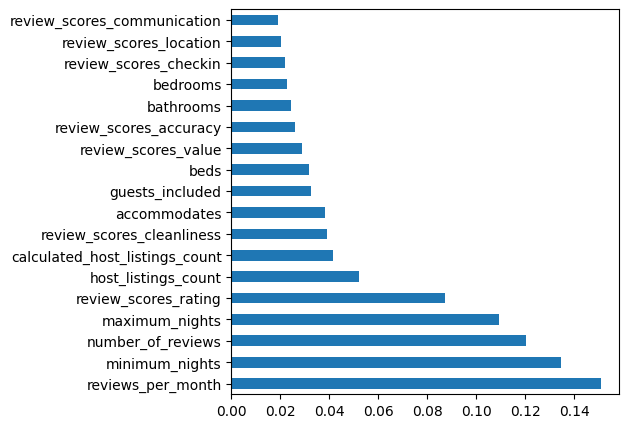

In [18]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(5,5))
feat_importances = pd.Series(feature_model.feature_importances_, index=df_model.iloc[:,:-1].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [19]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print("best_parameters_LR - ", best_parameters_LR)
    print(best_score_LR)

In [20]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)

In [21]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)


In [22]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

In [23]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle= True)
for train_index, test_index in kfold_cv.split(df_model_x,df_model_y):
    X_train, X_test = df_model_x[train_index], df_model_x[test_index]
    y_train, y_test = df_model_y[train_index], df_model_y[test_index]

In [24]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [25]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

In [26]:
df_model_xx= df_model.drop(['review_scores_communication', 
                                    'review_scores_checkin', 
                                    'bedrooms',
                                    'review_scores_location',
                                    'review_scores_accuracy',
                                    'guests_included',
                                    'review_scores_value',
                                    'bathrooms'
                                   ], axis = 1)

In [27]:
df_model_xx, df_model_yx = df_model_xx.iloc[:,:-1], df_model_xx.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(df_model_xx, df_model_yx, test_size=0.3,random_state=42)

In [28]:
scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(df_model_xx)

In [29]:
### Linear Regression ###
linear_reg(df_model_xx, df_model_yx, cv=4)

best_parameters_LR -  {'copy_X': True, 'fit_intercept': True}
-0.40615549409262935


In [30]:
### Ridge Regression ###
ridge_reg(df_model_xx, df_model_yx, cv=4)

{'alpha': 0.0}
-0.406155493961074


In [38]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

In [40]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.01)
ridge_x.fit(X_train_x, y_train_x)           
pred_ridge_x = ridge_x.predict(X_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.001)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01)
model_enet_x.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)

/Users/parthgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.06018e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/parthgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.544e+03, tolerance: 1.092e+00
  model = cd_fast.enet_coordinate_descent(
/Users/parthgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.560e+03, tolerance: 1.092e+00
  model = cd_fast.enet_coordinate_descent(
